https://bit.ly/RSML-2-content

## Датасет

In [62]:
import os
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import plotly.express as px

In [63]:
# !wget 'https://drive.google.com/uc?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx' -O MovieLens.zip
# !unzip MovieLens.zip

In [64]:
os.chdir('/Users/velo1/SynologyDrive/GIT_syno/data/RS/netology-recsys-master/lecture-1')
os.getcwd()

'/Users/velo1/SynologyDrive/GIT_syno/data/RS/netology-recsys-master/lecture-1'

In [65]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [126]:
tags.head(), tags.shape

(   userId  movieId              tag   timestamp                  dt  year  \
 0       2    60756            funny  1445714994 2015-10-24 22:29:54  2015   
 1       2    60756  Highly quotable  1445714996 2015-10-24 22:29:56  2015   
 2       2    60756     will ferrell  1445714992 2015-10-24 22:29:52  2015   
 3       2    89774     Boxing story  1445715207 2015-10-24 22:33:27  2015   
 4       2    89774              MMA  1445715200 2015-10-24 22:33:20  2015   
 
    month year_month  
 0     10    2015-10  
 1     10    2015-10  
 2     10    2015-10  
 3     10    2015-10  
 4     10    2015-10  ,
 (3683, 8))

### Пользователи

In [67]:
grouped_users = tags['userId'].value_counts()
grouped_users.head()

userId
474    1507
567     432
62      370
599     323
477     280
Name: count, dtype: int64

In [68]:
len(grouped_users)

58

In [69]:
grouped_users.median()

4.0

In [70]:
grouped_users.mean()

63.5

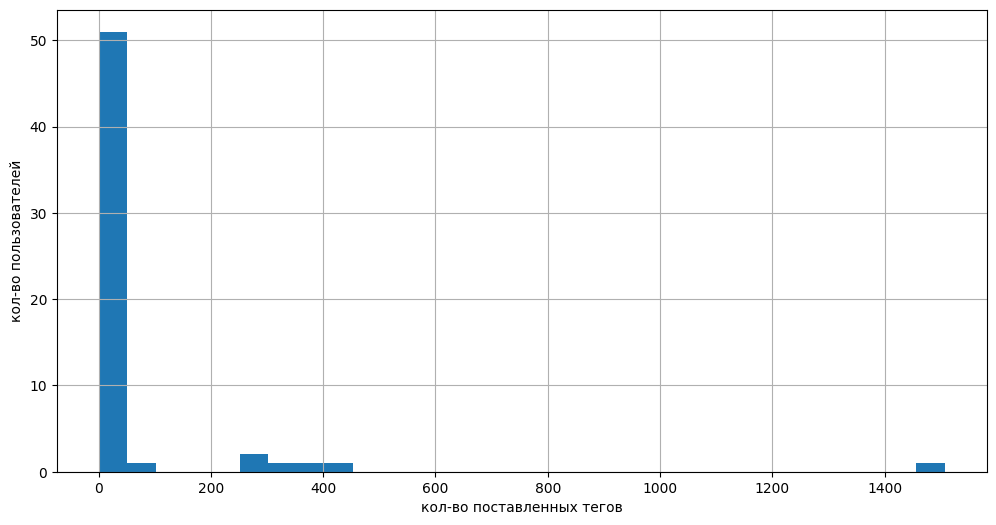

In [71]:
plt.figure(figsize=(12, 6))
grouped_users.hist(bins=30)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('кол-во пользователей');

In [72]:
fig = px.histogram(grouped_users, x=grouped_users.values,  nbins=150, title='Распределение кол-ва поставленных тегов')
fig.update_xaxes(title='кол-во поставленных тегов')
fig.update_yaxes(title='кол-во пользователей')
fig.show()

### Фильмы

In [73]:
grouped_movies = tags['movieId'].value_counts()
grouped_movies

movieId
296     181
2959     54
924      41
293      35
7361     34
       ... 
3307      1
3310      1
3317      1
830       1
2719      1
Name: count, Length: 1572, dtype: int64

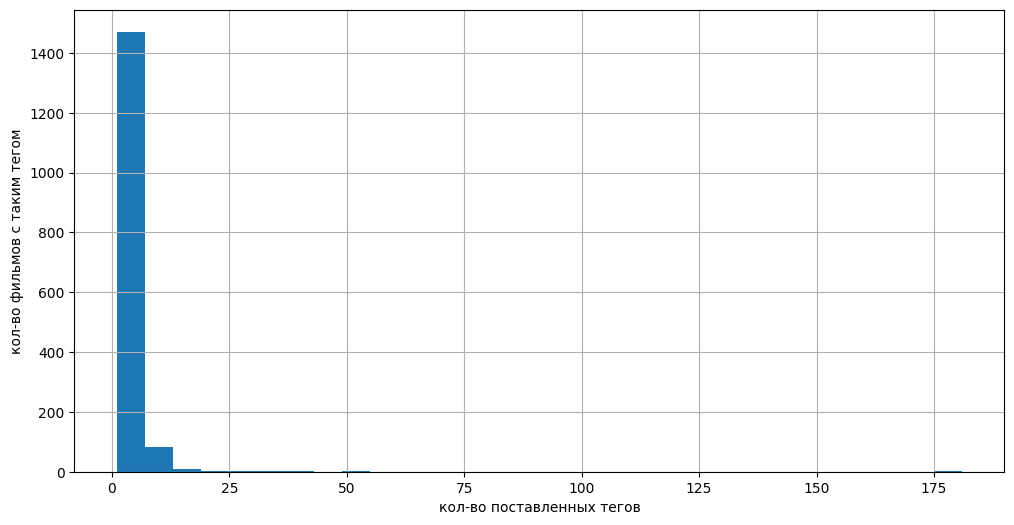

In [74]:
plt.figure(figsize=(12, 6))
grouped_movies.hist(bins=30)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('кол-во фильмов с таким тегом');

In [75]:
fig = px.histogram(grouped_movies, x=grouped_movies.values,  nbins=150, title='Распределение кол-ва поставленных тегов')
fig.update_xaxes(title='кол-во поставленных тегов')
fig.update_yaxes(title='кол-во фильмов с таким тегом')
fig.show()

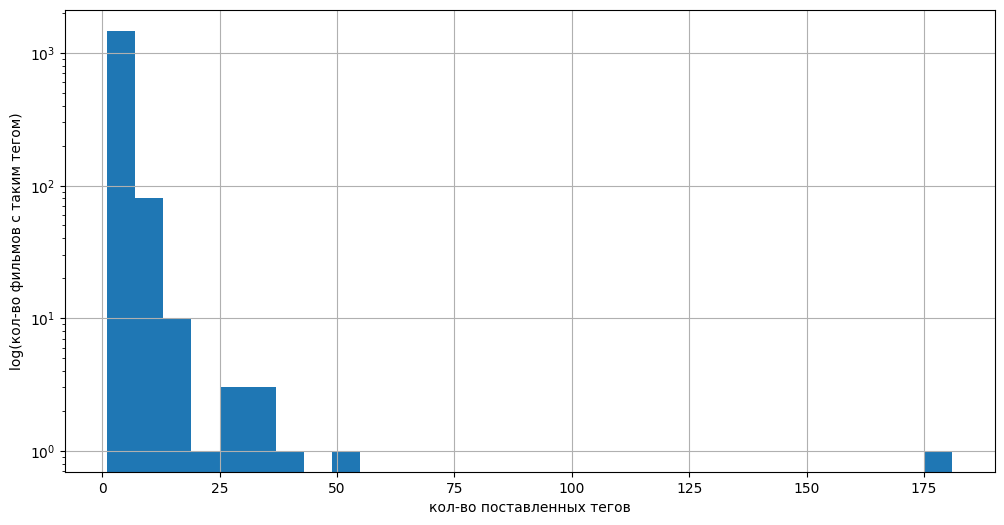

In [76]:
plt.figure(figsize=(12, 6))
grouped_movies.hist(bins=30, log=True)
plt.xlabel('кол-во поставленных тегов')
plt.ylabel('log(кол-во фильмов с таким тегом)');

In [77]:
fig = px.histogram(grouped_movies, x=grouped_movies.values,  nbins=150, title='Распределение кол-ва поставленных тегов')
fig.update_xaxes(title='кол-во поставленных тегов')
fig.update_yaxes(title='log(кол-во фильмов с таким тегом)')
fig.update_layout(yaxis_type='log')
fig.show()

In [78]:
tags[tags['movieId'] == 296]

,userId,movieId,tag,timestamp
409,103,296,good dialogue,1431954555
410,103,296,great soundtrack,1431954555
411,103,296,non-linear,1431954555
726,424,296,cult film,1457844546
727,424,296,drugs,1457844550
...,...,...,...,...
3549,599,296,unusual,1498456642
3550,599,296,very funny,1498456434
3551,599,296,violence,1498456347
3552,599,296,violent,1498456366


In [79]:
movies[movies['movieId'] == 296]

,movieId,title,genres
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


At everage each film was watched by 2.3 users

In [80]:
grouped_movies.mean()

2.3428753180661577

The half of the movies weren't watched at all.

In [81]:
grouped_movies.median()

1.0

### Дата

In [82]:
tags['dt'] = tags['timestamp'].apply(lambda t: datetime.fromtimestamp(t))
tags.head()

,userId,movieId,tag,timestamp,dt
0,2,60756,funny,1445714994,2015-10-24 22:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 22:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 22:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 22:33:27
4,2,89774,MMA,1445715200,2015-10-24 22:33:20


In [83]:
tags['year'] = tags['dt'].dt.year
tags['month'] = tags['dt'].dt.month

In [84]:
tags['year_month'] = tags['year'].astype(str) + '-' + tags['month'].astype(str)
tags.head()

,userId,movieId,tag,timestamp,dt,year,month,year_month
0,2,60756,funny,1445714994,2015-10-24 22:29:54,2015,10,2015-10
1,2,60756,Highly quotable,1445714996,2015-10-24 22:29:56,2015,10,2015-10
2,2,60756,will ferrell,1445714992,2015-10-24 22:29:52,2015,10,2015-10
3,2,89774,Boxing story,1445715207,2015-10-24 22:33:27,2015,10,2015-10
4,2,89774,MMA,1445715200,2015-10-24 22:33:20,2015,10,2015-10


In [85]:
grouped_date = tags['year_month'].value_counts()
grouped_date[:30]

year_month
2006-1     1462
2018-5      670
2017-6      323
2016-3      280
2015-2      109
2018-6      101
2009-5       87
2010-1       62
2009-6       52
2016-9       48
2018-9       46
2012-9       45
2006-2       39
2015-7       37
2010-3       35
2007-8       31
2018-7       21
2010-7       13
2006-3       13
2010-2       12
2015-10       9
2015-1        9
2009-9        9
2010-8        9
2006-10       9
2006-4        7
2015-8        7
2016-5        7
2009-2        7
2011-3        6
Name: count, dtype: int64

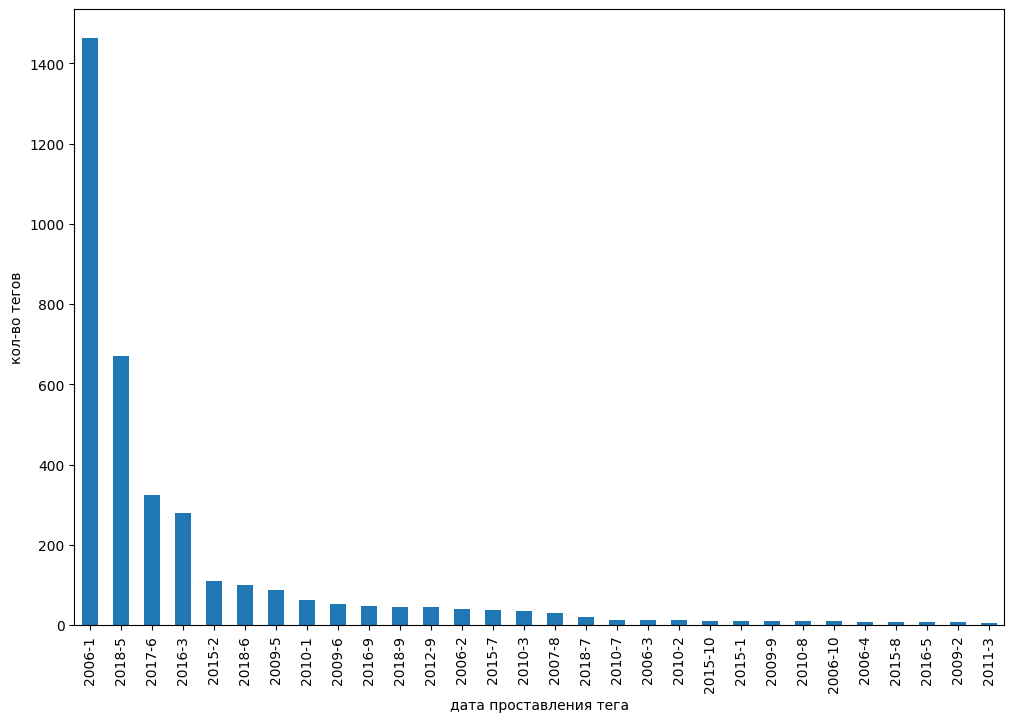

In [86]:
plt.figure(figsize=(12, 8))
grouped_date[:30].plot.bar()
plt.xlabel('дата проставления тега')
plt.ylabel('кол-во тегов');

### Жанры

In [87]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [88]:
movies['num_generes'] = movies['genres'].apply(lambda x: len(x.split('|')))
movies.head()

,movieId,title,genres,num_generes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [89]:
movies.sort_values('num_generes', ascending=False).head()

,movieId,title,genres,num_generes
7441,81132,Rubber (2010),Action|Adventure|Comedy|Crime|Drama|Film-Noir|...,10
5556,26701,Patlabor: The Movie (Kidô keisatsu patorebâ: T...,Action|Animation|Crime|Drama|Film-Noir|Mystery...,8
6626,56152,Enchanted (2007),Adventure|Animation|Children|Comedy|Fantasy|Mu...,7
2250,2987,Who Framed Roger Rabbit? (1988),Adventure|Animation|Children|Comedy|Crime|Fant...,7
5819,32031,Robots (2005),Adventure|Animation|Children|Comedy|Fantasy|Sc...,7


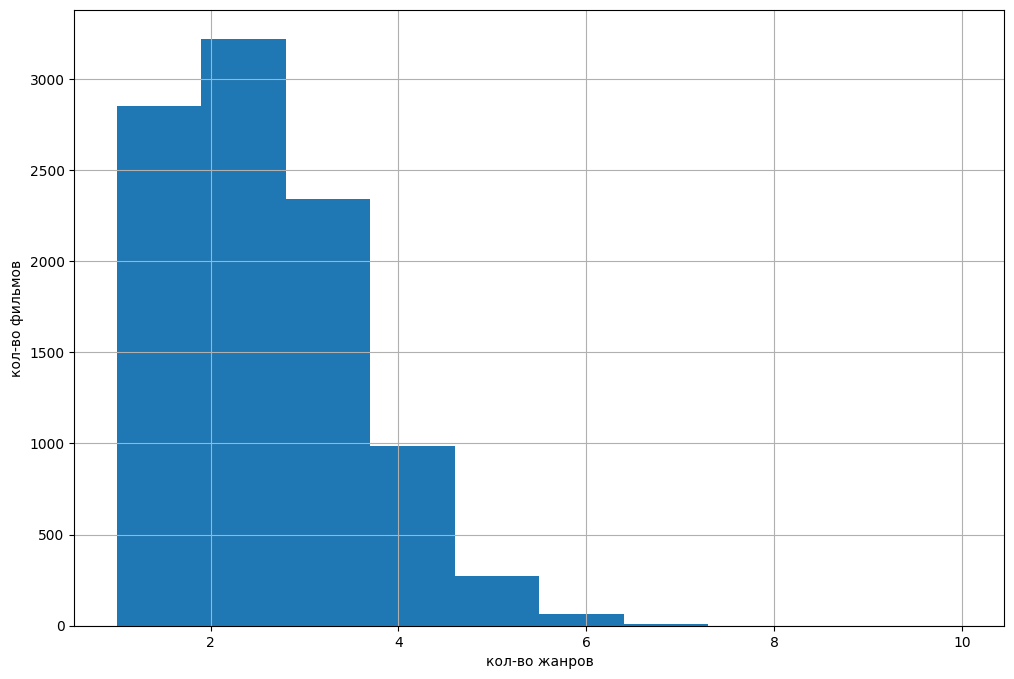

In [90]:
plt.figure(figsize=(12, 8))
movies['num_generes'].hist(bins=10)
plt.xlabel('кол-во жанров')
plt.ylabel('кол-во фильмов');

In [91]:
fig=px.histogram(movies, x='num_generes', nbins=10, title='Распределение кол-ва жанров')
fig.update_xaxes(title='кол-во жанров', tickmode='linear', dtick=1)
fig.update_yaxes(title='кол-во фильмов. log', type='log')
fig.update_layout(bargap=0.3)
fig.show()

In [92]:
np.mean(movies['num_generes'])

2.2668856497639087

In [93]:
np.median(movies['num_generes'])

2.0

## Рекомендации к фильму

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [95]:
movies.head()

,movieId,title,genres,num_generes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,1


In [96]:
def change_string(s) -> str:
    '''Преобразование строки жанров в строку без разделителей'''
    return ' '.join(s.replace(' ', '').replace('-', '').split('|'))

In [97]:
movie_genres = [change_string(g) for g in movies.genres.values]
movie_genres[:10]

['Adventure Animation Children Comedy Fantasy',
 'Adventure Children Fantasy',
 'Comedy Romance',
 'Comedy Drama Romance',
 'Comedy',
 'Action Crime Thriller',
 'Comedy Romance',
 'Adventure Children',
 'Action',
 'Action Adventure Thriller']

In [98]:
print(len(movie_genres))
len(set(movie_genres))

9742


951

### Преобразование данных в векторы

In [99]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=0, stop_words='english'
                        , max_features=10000)
X_train_tfidf = tfidf.fit_transform(movie_genres)
(X_train_tfidf)

<9742x20 sparse matrix of type '<class 'numpy.float64'>'
	with 22084 stored elements in Compressed Sparse Row format>

TfidfVectorizer split text into words and count tf-idf for each word in each document.

In [100]:
print(len(tfidf.get_feature_names_out()))
tfidf.get_feature_names_out()

20


array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'filmnoir', 'horror', 'imax',
       'musical', 'mystery', 'nogenreslisted', 'romance', 'scifi',
       'thriller', 'war', 'western'], dtype=object)

In [101]:
pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,filmnoir,horror,imax,musical,mystery,nogenreslisted,romance,scifi,thriller,war,western
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [102]:
test_df=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out()).join(movies)
test_df.head()

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,filmnoir,...,nogenreslisted,romance,scifi,thriller,war,western,movieId,title,genres,num_generes
0,0.0,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5
1,0.0,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,2,Jumanji (1995),Adventure|Children|Fantasy,3
2,0.0,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.821009,0.0,0.0,0.0,0.0,3,Grumpier Old Men (1995),Comedy|Romance,2
3,0.0,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,...,0.0,0.726241,0.0,0.0,0.0,0.0,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,5,Father of the Bride Part II (1995),Comedy,1


### Найдем ближайших соседей

In [103]:
neigh = NearestNeighbors(n_neighbors=7, metric='euclidean') 
neigh.fit(X_train_tfidf)

NearestNeighbors(metric='euclidean', n_neighbors=7)

In [104]:
test = change_string("Adventure|Comedy|Fantasy|Documentary")
print(test)
X_tfidf = tfidf.transform([test])

res = neigh.kneighbors(X_tfidf, return_distance=True)
print(res[0].shape, res[1].shape)
res

Adventure Comedy Fantasy Documentary
(1, 7) (1, 7)


(array([[0.38758619, 0.56525059, 0.58114553, 0.65617877, 0.65617877,
         0.66834044, 0.66834044]]),
 array([[8014, 5836, 8161, 4853, 7597, 2608, 3302]]))

In [105]:
movies.iloc[res[1][0]]

,movieId,title,genres,num_generes
8014,97757,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,5
5836,32314,Incident at Loch Ness (2004),Adventure|Comedy|Documentary,3
8161,102590,Darkon (2006),Documentary|Fantasy,2
4853,7256,Touching the Void (2003),Adventure|Documentary,2
7597,86593,African Cats (2011),Adventure|Documentary,2
2608,3489,Hook (1991),Adventure|Comedy|Fantasy,3
3302,4467,"Adventures of Baron Munchausen, The (1988)",Adventure|Comedy|Fantasy,3


In [106]:
movies_with_tags = movies.merge(tags, on='movieId')
print(movies_with_tags.shape)
movies_with_tags.head(10)

(3683, 11)


,movieId,title,genres,num_generes,userId,tag,timestamp,dt,year,month,year_month
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,336,pixar,1139045764,2006-02-04 11:36:04,2006,2,2006-2
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,474,pixar,1137206825,2006-01-14 04:47:05,2006,1,2006-1
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,567,fun,1525286013,2018-05-02 21:33:33,2018,5,2018-5
3,2,Jumanji (1995),Adventure|Children|Fantasy,3,62,fantasy,1528843929,2018-06-13 01:52:09,2018,6,2018-6
4,2,Jumanji (1995),Adventure|Children|Fantasy,3,62,magic board game,1528843932,2018-06-13 01:52:12,2018,6,2018-6
5,2,Jumanji (1995),Adventure|Children|Fantasy,3,62,Robin Williams,1528843907,2018-06-13 01:51:47,2018,6,2018-6
6,2,Jumanji (1995),Adventure|Children|Fantasy,3,474,game,1137375552,2006-01-16 03:39:12,2006,1,2006-1
7,3,Grumpier Old Men (1995),Comedy|Romance,2,289,moldy,1143424860,2006-03-27 05:01:00,2006,3,2006-3
8,3,Grumpier Old Men (1995),Comedy|Romance,2,289,old,1143424860,2006-03-27 05:01:00,2006,3,2006-3
9,5,Father of the Bride Part II (1995),Comedy,1,474,pregnancy,1137373903,2006-01-16 03:11:43,2006,1,2006-1


In [107]:
tags.sort_values('movieId').head()

,userId,movieId,tag,timestamp,dt,year,month,year_month
2886,567,1,fun,1525286013,2018-05-02 21:33:33,2018,5,2018-5
981,474,1,pixar,1137206825,2006-01-14 04:47:05,2006,1,2006-1
629,336,1,pixar,1139045764,2006-02-04 11:36:04,2006,2,2006-2
35,62,2,Robin Williams,1528843907,2018-06-13 01:51:47,2018,6,2018-6
34,62,2,magic board game,1528843932,2018-06-13 01:52:12,2018,6,2018-6


simulate dataframe merge using join by index

In [108]:
# movies_with_tags2 = movies.join(tags.set_index('movieId'), on='movieId', how='right')
movies_with_tags2 = movies.join(tags.set_index('movieId'), on='movieId', how='left')
print(movies_with_tags2.shape)
movies_with_tags2.tail(10)

(11853, 11)


,movieId,title,genres,num_generes,userId,tag,timestamp,dt,year,month,year_month
9732,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,4,184.0,remaster,1.537099e+09,2018-09-16 14:49:52,2018.0,9.0,2018-9
9733,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama,2,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9734,193571,Silver Spoon (2014),Comedy|Drama,2,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9735,193573,Love Live! The School Idol Movie (2015),Animation,1,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9736,193579,Jon Stewart Has Left the Building (2015),Documentary,1,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9739,193585,Flint (2017),Drama,1,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1,NaN,NaN,NaN,NaT,NaN,NaN,NaN


### Преобразуем теги в векторы

In [109]:
# movies_with_tags2[movies_with_tags2.title == 'Toy Story (1995)']

In [110]:
movies_with_tags[movies_with_tags.title == 'Toy Story (1995)']

,movieId,title,genres,num_generes,userId,tag,timestamp,dt,year,month,year_month
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,336,pixar,1139045764,2006-02-04 11:36:04,2006,2,2006-2
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,474,pixar,1137206825,2006-01-14 04:47:05,2006,1,2006-1
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,567,fun,1525286013,2018-05-02 21:33:33,2018,5,2018-5


In [111]:
print(movies_with_tags.tag.nunique())
movies_with_tags.tag.unique()

1589


array(['pixar', 'fun', 'fantasy', ..., 'star wars', 'gintama', 'remaster'],
      dtype=object)

In [112]:
movies_with_tags.tag.unique().shape

(1589,)

In [113]:
movies_with_tags.isna().sum()   

movieId        0
title          0
genres         0
num_generes    0
userId         0
tag            0
timestamp      0
dt             0
year           0
month          0
year_month     0
dtype: int64

In [114]:
movies_with_tags.dropna(inplace=True)

In [115]:
movies_with_tags.title.unique().shape

(1572,)

In [117]:
def change_string(s):
    return str(s).replace(' ', '').replace('-', '').lower()

tag_strings = []
movies = []

for movie, group in (movies_with_tags.groupby('title')):
    tag_strings.append(' '.join([change_string(s) for s in group.tag.values]))
    movies.append(movie)

In [118]:
tag_strings[:10]

['artistic funny humorous inspiring intelligent quirky romance zooeydeschanel',
 'lawyers',
 'creepy suspense',
 'shakespearesortof',
 'dogs remake',
 'disney',
 'terrorism',
 'court claustrophobic confrontational earnest gooddialogue greatscreenplay gritty motivational thoughtprovoking',
 'stranded',
 'markruffalo']

In [119]:
movies_with_tags[movies_with_tags['title'] == '(500) Days of Summer (2009)']

,movieId,title,genres,num_generes,userId,tag,timestamp,dt,year,month,year_month
3078,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,artistic,1279956134,2010-07-24 10:22:14,2010,7,2010-7
3079,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,Funny,1279956141,2010-07-24 10:22:21,2010,7,2010-7
3080,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,humorous,1279956124,2010-07-24 10:22:04,2010,7,2010-7
3081,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,inspiring,1279956130,2010-07-24 10:22:10,2010,7,2010-7
3082,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,intelligent,1279956132,2010-07-24 10:22:12,2010,7,2010-7
3083,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,quirky,1279956145,2010-07-24 10:22:25,2010,7,2010-7
3084,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,romance,1279956123,2010-07-24 10:22:03,2010,7,2010-7
3085,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,3,477,Zooey Deschanel,1279956120,2010-07-24 10:22:00,2010,7,2010-7


In [120]:
tfidf_tag = TfidfVectorizer()
X_train_tfidf_tag = tfidf_tag.fit_transform(tag_strings)
X_train_tfidf_tag

<1572x1472 sparse matrix of type '<class 'numpy.float64'>'
	with 3598 stored elements in Compressed Sparse Row format>

In [121]:
pd.DataFrame(X_train_tfidf_tag.toarray(), columns=tfidf_tag.get_feature_names_out())

,06oscarnominatedbestmovieanimation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001like,2danimation,...,worldwari,worldwarii,writing,wrongfulimprisonment,wry,youngermen,zither,zoekazan,zombies,zooeydeschanel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420342
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Найдем ближайших соседей

In [122]:
neigh_tag = NearestNeighbors(n_neighbors=10, p=1) 
# Parameter for the Minkowski metric from sklearn.metrics.pairwise.pairwise_distances. 
# When p = 1, this is equivalent to using manhattan_distance (l1), 
# and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
neigh_tag.fit(X_train_tfidf_tag)

NearestNeighbors(n_neighbors=10, p=1)

In [123]:
test = 'highschool | pixar | fun'

X_tfidf_tag = tfidf_tag.transform([test])

res = neigh_tag.kneighbors(X_tfidf_tag, return_distance=True)

In [124]:
res

(array([[1.49356676, 1.72639077, 1.72639077, 1.83027161, 2.72639077,
         2.72639077, 2.72639077, 2.72639077, 2.72639077, 2.72639077]]),
 array([[ 211,  661,  822, 1432,    5,   11,    8,    1,   14,   13]]))

In [125]:
for i in res[1][0]:
    print(movies[i], tag_strings[i])

Bug's Life, A (1998) pixar
In a Lonely Place (1950) l.a.
Magnolia (1999) l.a.
Toy Story (1995) pixar pixar fun
101 Dalmatians (One Hundred and One Dalmatians) (1961) disney
21 Grams (2003) depressing
127 Hours (2010) stranded
...And Justice for All (1979) lawyers
39 Steps, The (1935) fugitive
28 Days Later (2002) zombies zombies
